In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import prep

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['text_cleaned'] = df.text.apply(prep.basic_clean)

In [5]:
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [6]:
df['text_tokenized'] = df.text_cleaned.apply(prep.tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [7]:
df['text_lemmatized'] = df.text_tokenized.apply(prep.lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [8]:
df['text_filtered'] = df.text_lemmatized.apply(prep.remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [9]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [10]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


In [11]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

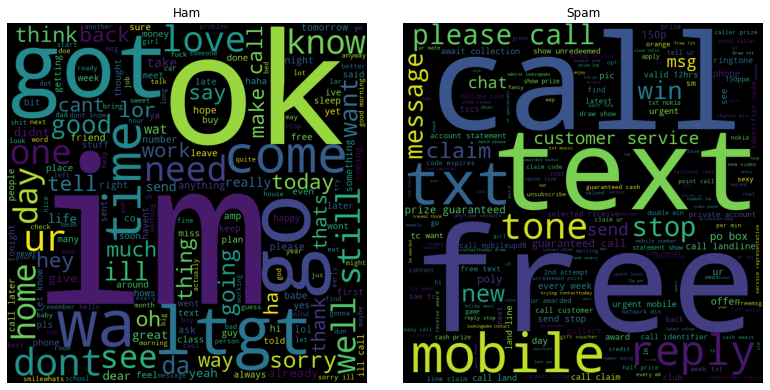

In [12]:
from wordcloud import WordCloud

ham_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(spam_words)


plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

In [13]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,..."


In [14]:
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think..."


In [15]:
df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams,fourgrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ...","[(go, jurong, point, crazy), (jurong, point, c..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]","[(ok, lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi...","[(free, entrywkly, comp, win), (entrywkly, com..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early...","[(u, dun, say, early), (dun, say, early, horc)..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think...","[(nah, dont, think, go), (dont, think, go, usf..."


In [16]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(25)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(25)
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(25)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(25)
ham_fourgrams = pd.Series(list(nltk.ngrams(ham_words.split(), 4))).value_counts().head(25)
spam_fourgrams = pd.Series(list(nltk.ngrams(spam_words.split(), 4))).value_counts().head(25)

In [17]:
ham_bigrams

(call, later)      47
(ill, call)        45
(let, know)        41
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        26
(pls, send)        22
(im, going)        22
(take, care)       21
(im, gonna)        19
(ltgt, min)        19
(ok, lor)          19
(good, night)      19
(hi, hi)           18
(last, night)      18
(great, day)       17
(happy, new)       15
(send, message)    14
(like, ltgt)       14
(pick, phone)      13
(want, go)         13
(dont, think)      13
(cant, pick)       13
(dont, want)       12
dtype: int64

In [18]:
spam_bigrams

(please, call)          42
(customer, service)     27
(po, box)               23
(guaranteed, call)      23
(1000, cash)            22
(prize, guaranteed)     22
(every, week)           19
(send, stop)            19
(await, collection)     18
(urgent, mobile)        18
(show, 800)             18
(land, line)            18
(valid, 12hrs)          17
(sae, tc)               16
(claim, call)           16
(account, statement)    16
(identifier, code)      15
(reply, call)           15
(selected, receive)     15
(call, 08000930705)     15
(call, mobileupd8)      15
(call, customer)        15
(2000, prize)           14
(2nd, attempt)          14
(ur, awarded)           14
dtype: int64

In [19]:
ham_trigrams

(sorry, ill, call)                 38
(ill, call, later)                 38
(happy, new, year)                 13
(pick, phone, right)               12
(pls, send, message)               12
(right, pls, send)                 12
(phone, right, pls)                12
(cant, pick, phone)                12
(hi, hi, hi)                       11
(good, morning, dear)               7
(convey, birthday, wish)            6
(kiss, across, sea)                 6
(pls, convey, birthday)             6
(wa, bday, wife)                    5
(presscopy, friend, callertune)     5
(story, man, last)                  5
(happy, bday, bos)                  5
(special, askdlunch, lunch)         5
(week, wa, bday)                    5
(go, bedroom, minute)               5
(bedroom, minute, ok)               5
(entered, cabin, pa)                5
(wish, parent, forgotkid)           5
(even, colleague, wish)             5
(cabin, pa, said)                   5
dtype: int64

In [20]:
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             13
(private, 2003, account)               13
(2003, account, statement)             13
(camcorder, reply, call)               12
(guaranteed, 1000, cash)               12
(show, 800, unredeemed)                12
(bonus, caller, prize)                 11
(every, week, txt)                     11
(anytime, network, min)                11
(customer, service, representative)    10
(cash, await, collection)              10
(1000, cash, 2000)                     10
(2000, bonus, caller)                  10
(please, call, customer)               10
(unredeemed, point, call)               9
(urgent, mobile, number)                9
(mob, every, week)                      9
(trying, contacttoday, draw)            9
(mobile, number, ha)                    9
(toneur, mob, every)                    9
(free, 1st, week)                 

In [21]:
ham_fourgrams

(sorry, ill, call, later)                  34
(phone, right, pls, send)                  12
(pick, phone, right, pls)                  12
(cant, pick, phone, right)                 12
(right, pls, send, message)                11
(pls, convey, birthday, wish)               6
(hi, hi, hi, hi)                            6
(pa, said, happy, bday)                     5
(ok, sed, sexy, mood)                       5
(minute, ok, sed, sexy)                     5
(saidmind, go, bedroom, minute)             5
(special, askdlunch, lunch, invited)        5
(bday, bos, felt, special)                  5
(callertune, caller, presscopy, friend)     5
(bday, wife, didnt, wish)                   5
(forgotkid, went, work, even)               5
(sexy, mood, cameminuts, latr)              5
(latr, wid, caken, wife)                    5
(entered, cabin, pa, said)                  5
(last, week, wa, bday)                      5
(ill, call, later, meeting)                 5
(happy, bday, bos, felt)          

In [22]:
spam_fourgrams

(private, 2003, account, statement)          13
(2000, bonus, caller, prize)                 10
(call, customer, service, representative)    10
(camcorder, reply, call, 08000930705)        10
(please, call, customer, service)            10
(draw, txt, music, 87066)                     9
(2000, prize, guaranteed, call)               9
(mob, every, week, txt)                       9
(toneur, mob, every, week)                    9
(750, anytime, network, min)                  9
(show, 800, unredeemed, point)                9
(trying, contacttoday, draw, show)            9
(800, unredeemed, point, call)                9
(lookingmake, contact, ufind, rreveal)        8
(await, collection, sae, tc)                  8
(mobile, number, ha, awarded)                 8
(urgent, trying, contacttoday, draw)          8
(ufind, rreveal, think, ur)                   8
(urgent, mobile, number, ha)                  8
(admirer, lookingmake, contact, ufind)        8
(claim, 3030, valid, 12hrs)             

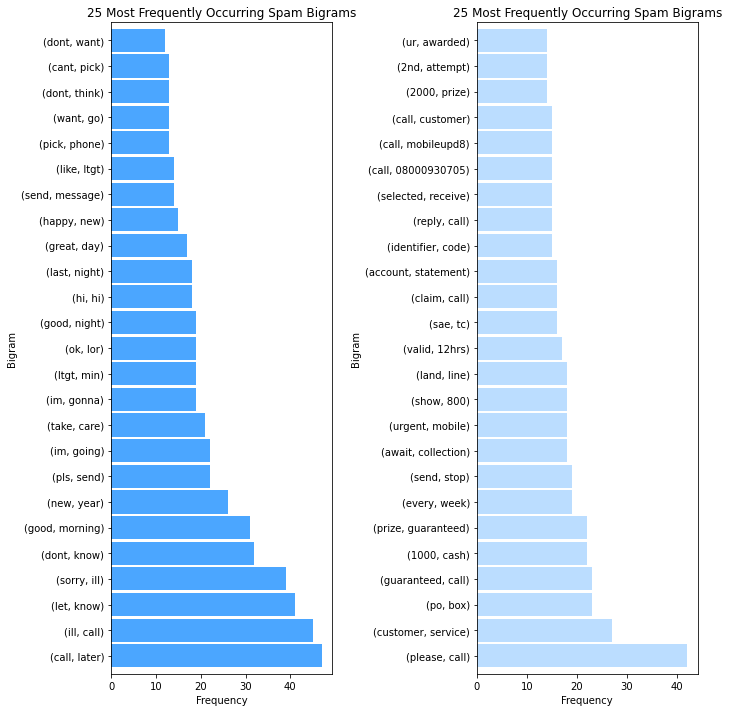

In [23]:
plt.subplot(121)
ham_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

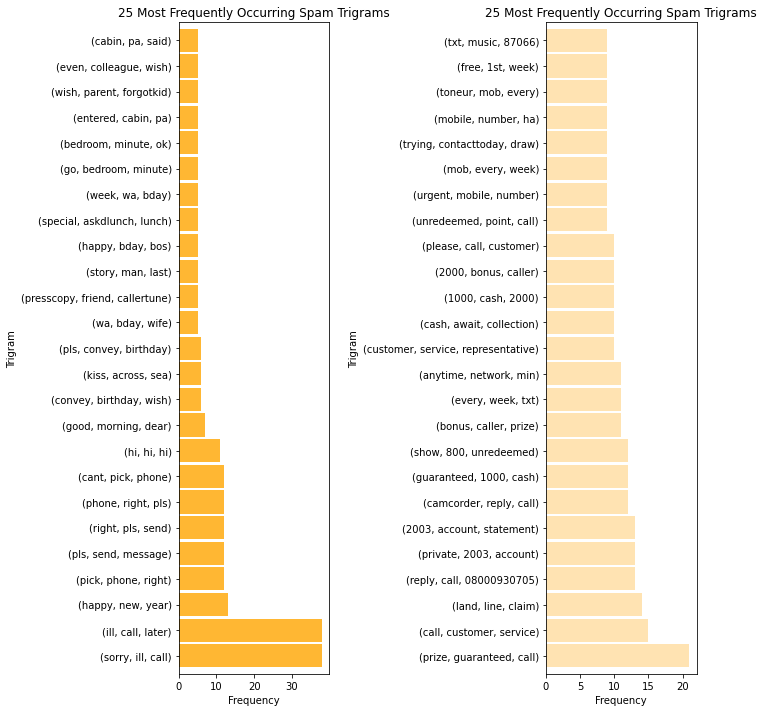

In [24]:
plt.subplot(121)
ham_trigrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

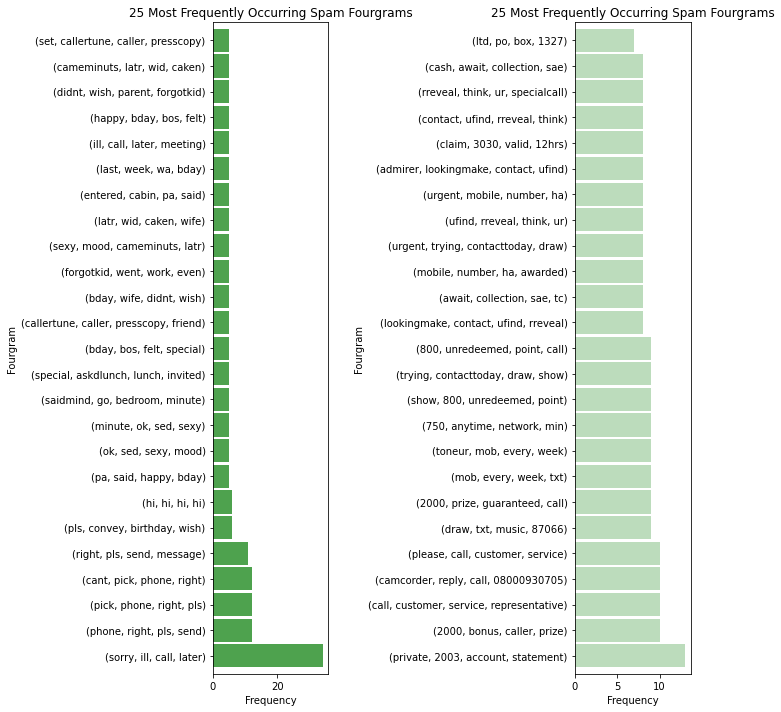

In [25]:
plt.subplot(121)
ham_fourgrams.plot.barh(color='forestgreen', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Spam Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_fourgrams.plot.barh(color='forestgreen', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

{'sorry ill call later': 34, 'phone right pls send': 12, 'pick phone right pls': 12, 'cant pick phone right': 12, 'right pls send message': 11, 'pls convey birthday wish': 6, 'hi hi hi hi': 6, 'pa said happy bday': 5, 'ok sed sexy mood': 5, 'minute ok sed sexy': 5, 'saidmind go bedroom minute': 5, 'special askdlunch lunch invited': 5, 'bday bos felt special': 5, 'callertune caller presscopy friend': 5, 'bday wife didnt wish': 5, 'forgotkid went work even': 5, 'sexy mood cameminuts latr': 5, 'latr wid caken wife': 5, 'entered cabin pa said': 5, 'last week wa bday': 5, 'ill call later meeting': 5, 'happy bday bos felt': 5, 'didnt wish parent forgotkid': 5, 'cameminuts latr wid caken': 5, 'set callertune caller presscopy': 5}


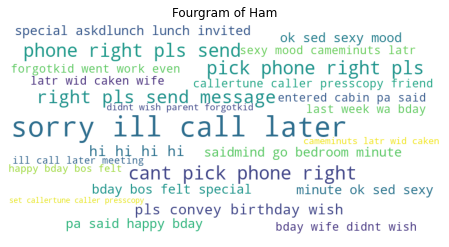

In [26]:
hfg = {k[0] + ' ' + k[1] + ' ' + k[2] + ' ' + k[3]: v for k, v in ham_fourgrams.to_dict().items()}
img1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(hfg)
plt.figure(figsize=(8, 4))
plt.imshow(img1)
plt.title('Fourgram of Ham')
plt.axis('off')
print(hfg)

{'sorry ill call': 38, 'ill call later': 38, 'happy new year': 13, 'pick phone right': 12, 'pls send message': 12, 'right pls send': 12, 'phone right pls': 12, 'cant pick phone': 12, 'hi hi hi': 11, 'good morning dear': 7, 'convey birthday wish': 6, 'kiss across sea': 6, 'pls convey birthday': 6, 'wa bday wife': 5, 'presscopy friend callertune': 5, 'story man last': 5, 'happy bday bos': 5, 'special askdlunch lunch': 5, 'week wa bday': 5, 'go bedroom minute': 5, 'bedroom minute ok': 5, 'entered cabin pa': 5, 'wish parent forgotkid': 5, 'even colleague wish': 5, 'cabin pa said': 5}


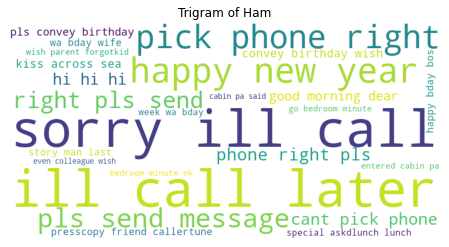

In [27]:
htg = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(htg)
plt.figure(figsize=(8, 4))
plt.imshow(img2)
plt.title('Trigram of Ham')
plt.axis('off')
print(htg)

{'call later': 47, 'ill call': 45, 'let know': 41, 'sorry ill': 39, 'dont know': 32, 'good morning': 31, 'new year': 26, 'pls send': 22, 'im going': 22, 'take care': 21, 'im gonna': 19, 'ltgt min': 19, 'ok lor': 19, 'good night': 19, 'hi hi': 18, 'last night': 18, 'great day': 17, 'happy new': 15, 'send message': 14, 'like ltgt': 14, 'pick phone': 13, 'want go': 13, 'dont think': 13, 'cant pick': 13, 'dont want': 12}


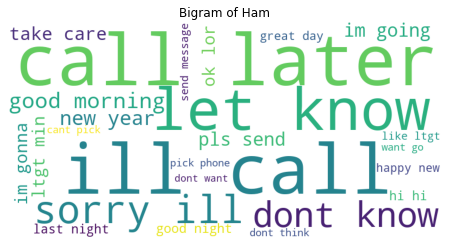

In [28]:
hbg = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(hbg)
plt.figure(figsize=(8, 4))
plt.imshow(img3)
plt.title('Bigram of Ham')
plt.axis('off')
print(hbg)

In [29]:
blogs = pd.read_json('blogs.json')
blogs.head()

,title,body
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [30]:
blog_df = prep.prep_article_data(blogs, 'body', extra_words=[], exclude_words=[])

In [31]:
blog_df.head()

,title,body,stemmed,lemmatized,clean
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...


In [32]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in blog_df.clean]
blog_df = pd.concat([blog_df, pd.DataFrame({'words': words})], axis=1)

In [33]:
blog_df

,title,body,stemmed,lemmatized,clean,words
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger..."


In [34]:
blog_df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)..."


In [35]:
blog_df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,..."


In [36]:
blog_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [37]:
blog_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [38]:
blog_df.insert(0, "type", "blog") 
blog_df.head() 

,type,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,blog,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,blog,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,blog,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,blog,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,blog,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [39]:
words = ' '.join(blog_df[blog_df.type=='blog'].clean)

words = re.sub(r'\s.\s', '', words)


bigrams = pd.Series(list(nltk.ngrams(words.split(), 2))).value_counts().head(25)
trigrams = pd.Series(list(nltk.ngrams(words.split(), 3))).value_counts().head(25)
fourgrams = pd.Series(list(nltk.ngrams(words.split(), 4))).value_counts().head(25)

Text(0.5, 0, 'Frequency')

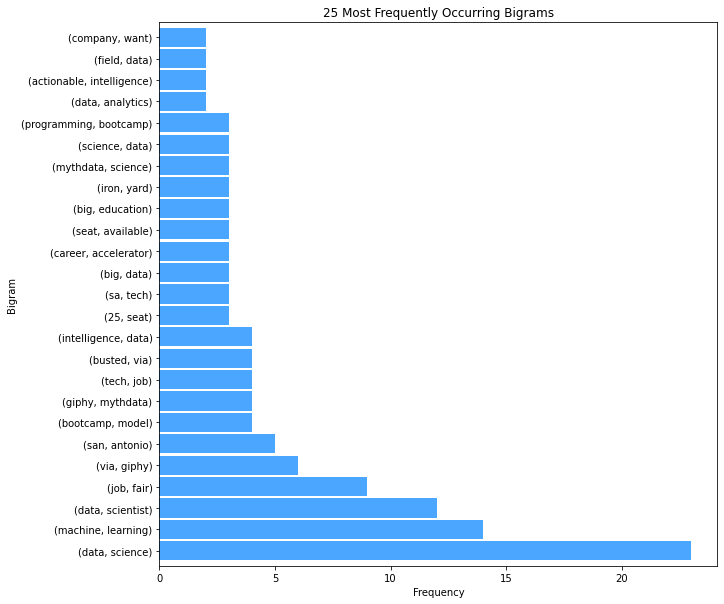

In [40]:
bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

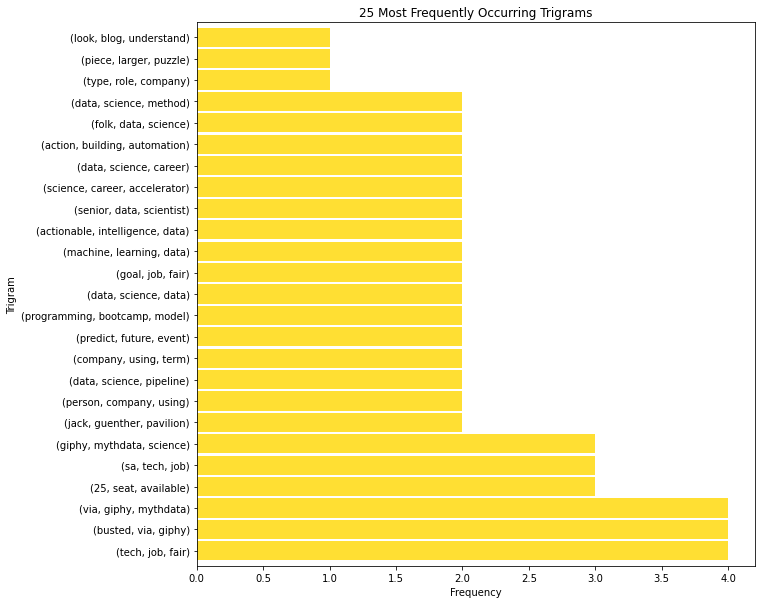

In [41]:
trigrams.plot.barh(color='gold', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

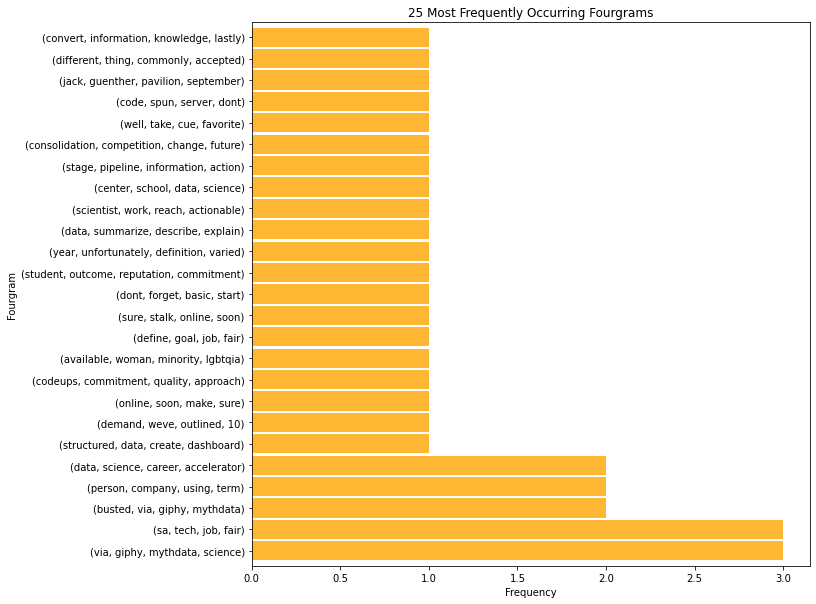

In [42]:
fourgrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')

{'data science': 23, 'machine learning': 14, 'data scientist': 12, 'job fair': 9, 'via giphy': 6, 'san antonio': 5, 'bootcamp model': 4, 'giphy mythdata': 4, 'tech job': 4, 'busted via': 4, 'intelligence data': 4, '25 seat': 3, 'sa tech': 3, 'big data': 3, 'career accelerator': 3, 'seat available': 3, 'big education': 3, 'iron yard': 3, 'mythdata science': 3, 'science data': 3, 'programming bootcamp': 3, 'data analytics': 2, 'actionable intelligence': 2, 'field data': 2, 'company want': 2}


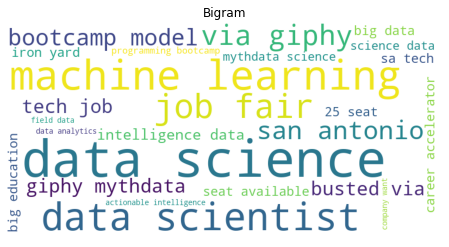

In [43]:
bg = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
img4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(bg)
plt.figure(figsize=(8, 4))
plt.imshow(img4)
plt.title('Bigram')
plt.axis('off')
print(bg)

{'tech job fair': 4, 'busted via giphy': 4, 'via giphy mythdata': 4, '25 seat available': 3, 'sa tech job': 3, 'giphy mythdata science': 3, 'jack guenther pavilion': 2, 'person company using': 2, 'data science pipeline': 2, 'company using term': 2, 'predict future event': 2, 'programming bootcamp model': 2, 'data science data': 2, 'goal job fair': 2, 'machine learning data': 2, 'actionable intelligence data': 2, 'senior data scientist': 2, 'science career accelerator': 2, 'data science career': 2, 'action building automation': 2, 'folk data science': 2, 'data science method': 2, 'type role company': 1, 'piece larger puzzle': 1, 'look blog understand': 1}


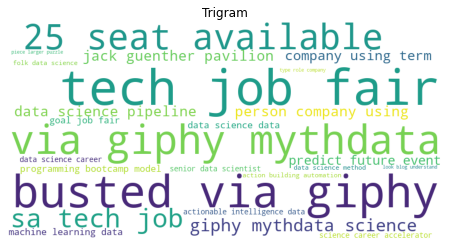

In [44]:
tg = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in trigrams.to_dict().items()}
img5 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(tg)
plt.figure(figsize=(8, 4))
plt.imshow(img5)
plt.title('Trigram')
plt.axis('off')
print(tg)

{'via giphy mythdata science': 3, 'sa tech job fair': 3, 'busted via giphy mythdata': 2, 'person company using term': 2, 'data science career accelerator': 2, 'structured data create dashboard': 1, 'demand weve outlined 10': 1, 'online soon make sure': 1, 'codeups commitment quality approach': 1, 'available woman minority lgbtqia': 1, 'define goal job fair': 1, 'sure stalk online soon': 1, 'dont forget basic start': 1, 'student outcome reputation commitment': 1, 'year unfortunately definition varied': 1, 'data summarize describe explain': 1, 'scientist work reach actionable': 1, 'center school data science': 1, 'stage pipeline information action': 1, 'consolidation competition change future': 1, 'well take cue favorite': 1, 'code spun server dont': 1, 'jack guenther pavilion september': 1, 'different thing commonly accepted': 1, 'convert information knowledge lastly': 1}


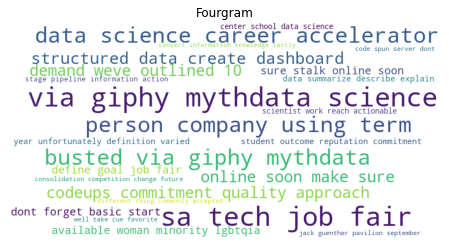

In [45]:
fg = {k[0] + ' ' + k[1] + ' ' + k[2] + ' ' + k[3]: v for k, v in fourgrams.to_dict().items()}
img6 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(fg)
plt.figure(figsize=(8, 4))
plt.imshow(img6)
plt.title('Fourgram')
plt.axis('off')
print(fg)